# Predictive Analytics Framework for Cervical Cancer Risk Assessment
![alt text](<WhatsApp Image 2025-05-25 at 16.00.48_95059059.jpg>)

## Introduction
Cervical cancer remains a leading cause of cancer-related deaths among women in Kenya, despite being highly preventable through regular screening and early detection. The current healthcare system faces significant challenges including inconsistent risk assessment, fragmented care coordination, supply chain inefficiencies, and complex financial barriers that prevent timely access to screening services.
Our AI-powered cervical cancer care coordination platform addresses these critical gaps by integrating machine learning risk prediction, personalized care planning, real-time inventory management, and financial navigation tools. This comprehensive solution empowers healthcare providers to deliver more accurate, timely, and accessible cervical cancer care while optimizing resource utilization across the Kenyan healthcare system.

## Business Understanding

**Problem Statement**

Kenya's cervical cancer care system faces critical inefficiencies that contribute to preventable deaths. Healthcare providers lack standardized risk assessment tools, resulting in missed high-risk patients and misallocated resources. Care coordination is fragmented with inconsistent scheduling that doesn't align with national guidelines, leading to missed appointments and duplicated procedures. Healthcare facilities experience frequent supply shortages of essential screening materials like Pap smear kits and HPV tests, causing unpredictable delays. Additionally, patients struggle to navigate complex financing options including NHIF coverage, often delaying or avoiding care due to cost barriers. These interconnected systemic failures prevent timely, accurate cervical cancer screening, contributing to Kenya's high burden of advanced-stage cases that could have been prevented through early detection.

**Business Objectives:**

To develop an integrated AI platform that:

- Enhances Clinical Decision-Making through ML-powered risk stratification
- Optimizes Care Scheduling with personalized, guideline-compliant screening plans
- Improves Supply Chain Management via real-time inventory tracking and predictive analytics
- Facilitates Financial Access through integrated cost estimation and financing navigation

***Success Metrics***

Clinical Accuracy: ≥85% precision in ML risk prediction models for patient risk classification
Scheduling Accuracy: >90% compliance with Kenyan national guidelines in generated screening schedules
Inventory Prediction Accuracy: >95% accuracy in 30-day supply forecasting to prevent stockouts
Cost Estimation Accuracy: <5% variance between estimated and actual screening procedure costs

Target Users

- Primary: Healthcare providers (nurses, clinical officers, physicians) in Kenyan public and private facilities
- Secondary: Healthcare administrators, financial counselors, policy makers
- Beneficiaries: Women aged 21-65 requiring cervical cancer screening, particularly underserved populations

**Value Proposition**

The platform delivers measurable value through improved clinical outcomes via earlier detection, enhanced operational efficiency through optimized resource allocation, increased access through simplified financial navigation, and data-driven insights supporting continuous care improvement and evidence-based policy development.

In [1]:
#Loading necessary libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
%matplotlib inline

from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

## Data Understanding

In [2]:
#Loading the dataset
cervical_data =pd.read_excel('Datasets/Cervical Cancer Datasets_.xlsx')
cost_data = pd.read_excel('Datasets/Resources Inventory Cost Sheet.xlsx')
Treatment_data = pd.read_excel('Datasets/Treatment Costs Sheet.xlsx')


In [3]:
#Checking the shape of the datasets
print(f"Cervical Data Shape: {cervical_data.shape}")
print(f"Cost Data Shape: {cost_data.shape}")
print(f"Treatment Data Shape: {Treatment_data.shape}")

Cervical Data Shape: (100, 13)
Cost Data Shape: (100, 6)
Treatment Data Shape: (100, 8)


### Cervical Cancer Data Analysis

In [4]:
#checking the first few rows of the dataset
cervical_data.head()

,Patient ID,Age,Sexual Partners,First Sexual Activity Age,HPV Test Result,Pap Smear Result,Smoking Status,STDs History,Region,Insrance Covered,Screening Type Last,Recommended Action,Unnamed: 12
0,P0001,18,4,15,NEGATIVE,N,N,Y,Pumwani,Y,PAP SMEAR,REPEAT PAP SMEAR IN 3 YEARS AND FOR HPV VACCINE,NaN
1,P0002,15,1,14,POSITIVE,N,Y,Y,Kakamega,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN
2,P0003,34,1,9,POSITIVE,N,N,Y,Machakos,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN
3,P0004,52,5,16,POSITIVE,N,Y,N,Embu,Y,HPV DNA,"FOR HPV VACCINE, LIFESTYLE AND SEXUAL EDUCATION",NaN
4,P0005,46,3,21,POSITIVE,N,N,N,Mombasa,N,HPV DNA,FOR HPV VACCINE AND SEXUAL EDUCATION,NaN


In [5]:
cervical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient ID                 100 non-null    object
 1   Age                        100 non-null    int64 
 2   Sexual Partners            100 non-null    int64 
 3   First Sexual Activity Age  100 non-null    int64 
 4   HPV Test Result            100 non-null    object
 5   Pap Smear Result           100 non-null    object
 6   Smoking Status             100 non-null    object
 7   STDs History               100 non-null    object
 8   Region                     100 non-null    object
 9   Insrance Covered           100 non-null    object
 10  Screening Type Last        100 non-null    object
 11  Recommended Action         100 non-null    object
 12  Unnamed: 12                1 non-null      object
dtypes: int64(3), object(10)
memory usage: 10.3+ KB


In [6]:
cervical_data.columns

Index(['Patient ID', 'Age', 'Sexual Partners', 'First Sexual Activity Age',
       'HPV Test Result', 'Pap Smear Result', 'Smoking Status', 'STDs History',
       'Region', 'Insrance Covered', 'Screening Type Last',
       'Recommended Action', 'Unnamed: 12'],
      dtype='object')

In [7]:
#Dropping unnecessary columns
cervical_data.drop(columns=['Unnamed: 12'], inplace=True)

In [8]:
cervical_data.describe()

,Age,Sexual Partners,First Sexual Activity Age
count,100.000000,100.000000,100.000000
mean,37.430000,2.740000,18.830000
std,10.961139,1.432805,5.630105
min,15.000000,1.000000,2.000000
25%,34.000000,2.000000,16.000000
50%,36.000000,3.000000,18.000000
75%,40.000000,3.000000,20.000000
max,89.000000,9.000000,57.000000


In [9]:
#Checking for missing values in the dataset
cervical_data.isnull().sum()

Patient ID                   0
Age                          0
Sexual Partners              0
First Sexual Activity Age    0
HPV Test Result              0
Pap Smear Result             0
Smoking Status               0
STDs History                 0
Region                       0
Insrance Covered             0
Screening Type Last          0
Recommended Action           0
dtype: int64

In [10]:
# Analyzimg categorical variables
categorical_cols = ['HPV Test Result', 'Pap Smear Result', 'Smoking Status', 
                   'STDs History', 'Region', 'Insurance Covered', 
                   'Screening Type Last', 'Recommended Action']

print("=== CATEGORICAL VARIABLES ANALYSIS ===")
for col in categorical_cols:
    if col in cervical_data.columns:
        print(f"\n{col}:")
        print(cervical_data[col].value_counts())

=== CATEGORICAL VARIABLES ANALYSIS ===

HPV Test Result:
HPV Test Result
NEGATIVE      47
POSITIVE      46
POSITIVE\n     6
NEGAGTIVE      1
Name: count, dtype: int64

Pap Smear Result:
Pap Smear Result
N    65
Y    35
Name: count, dtype: int64

Smoking Status:
Smoking Status
N    60
Y    40
Name: count, dtype: int64

STDs History:
STDs History
N    52
Y    48
Name: count, dtype: int64

Region:
Region
Embu         14
Kericho      11
Mombasa      10
Kitale        9
Loitoktok     9
Kakamega      8
Machakos      7
Moi           5
Mombasa       5
Pumwani       4
Pumwani       3
Kitale        3
Garissa       2
Garissa       2
Kericho       2
Machakos      2
Moi           2
Kakamega      1
NAKURU        1
Name: count, dtype: int64

Screening Type Last:
Screening Type Last
PAP SMEAR    39
VIA          31
HPV DNA      30
Name: count, dtype: int64

Recommended Action:
Recommended Action
REPEAT PAP SMEAR IN 3 YEARS                                 25
FOR COLPOSCOPY BIOPSY, CYTOLOGY               

In [11]:
#Cleaning the HPV Test Result column
cervical_data['HPV Test Result'] = cervical_data['HPV Test Result'].str.strip().str.upper()
cervical_data['HPV Test Result'] = cervical_data['HPV Test Result'].replace({'NEGAGTIVE': 'NEGATIVE'})

cervical_data['HPV Test Result'].value_counts()

HPV Test Result
POSITIVE    52
NEGATIVE    48
Name: count, dtype: int64

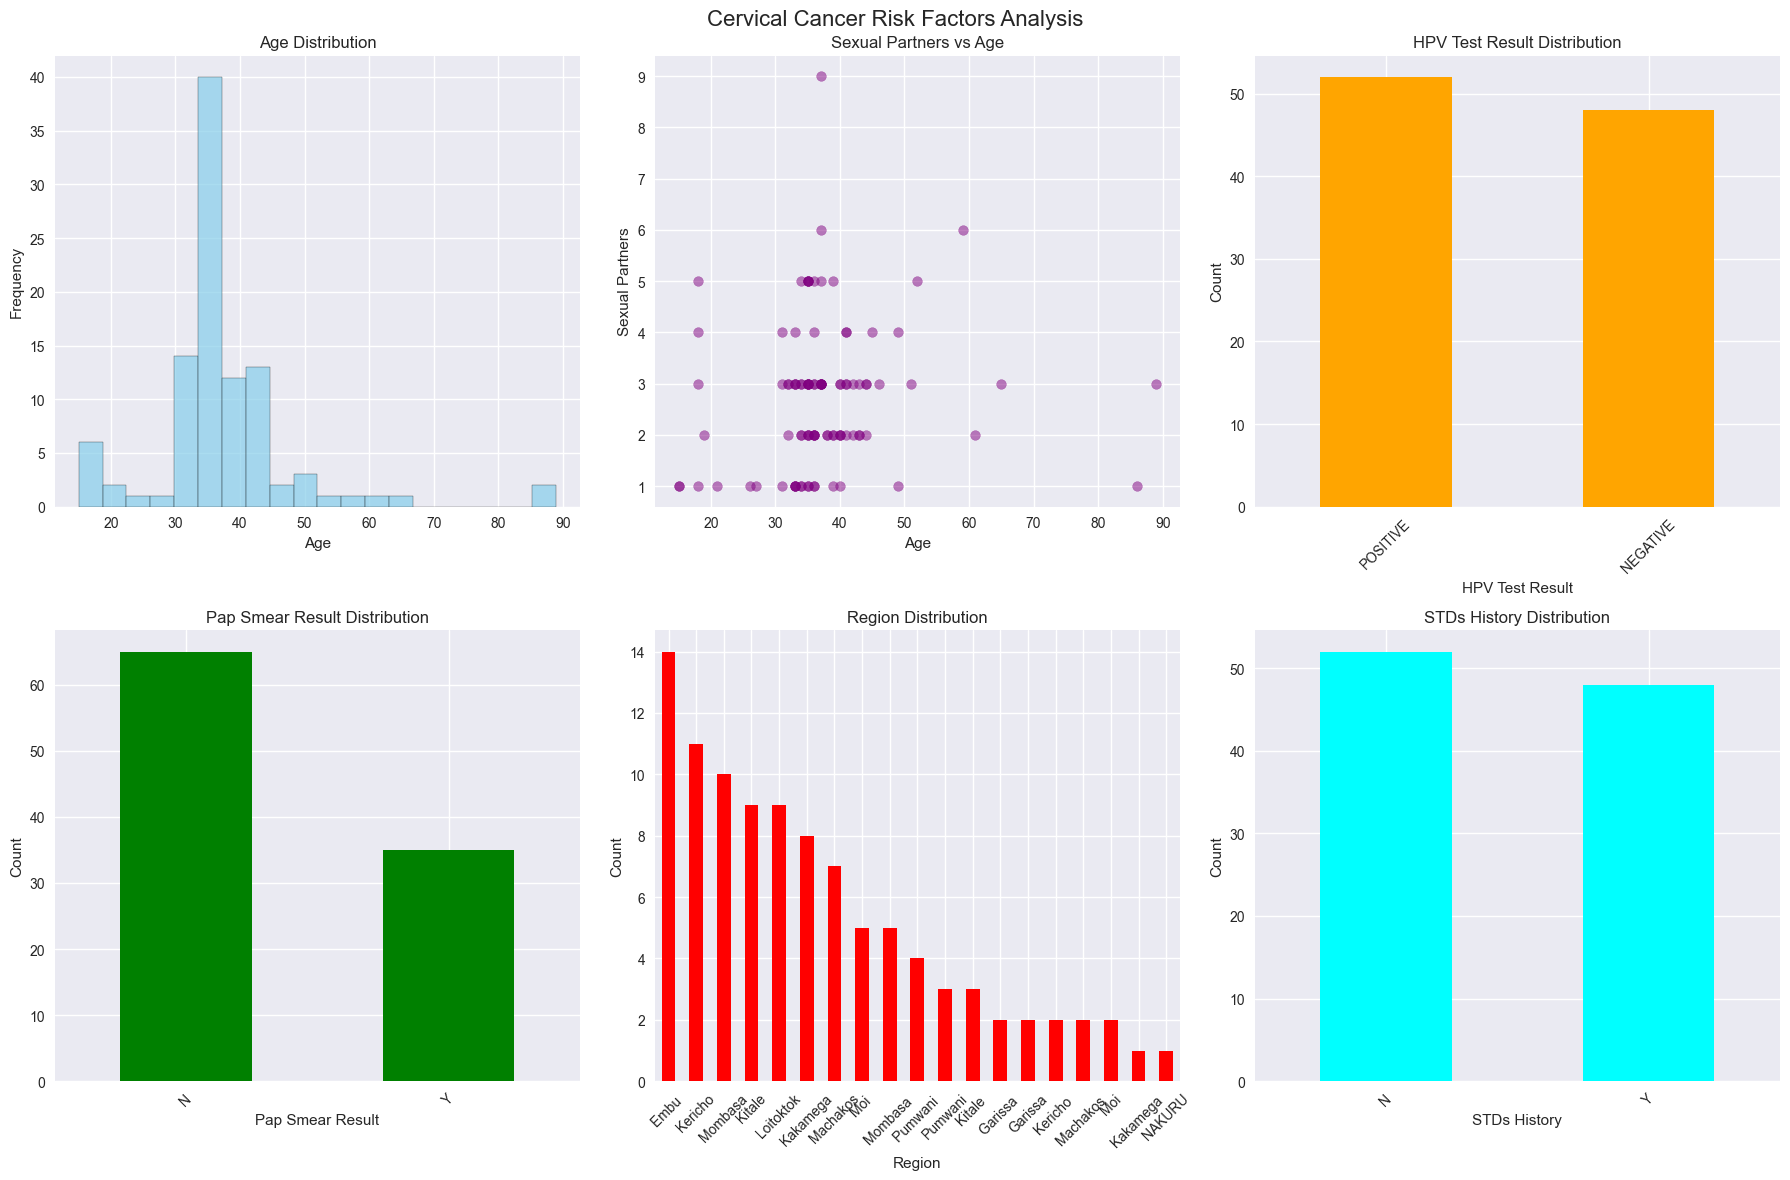

In [12]:
#Visualizing key relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Cervical Cancer Risk Factors Analysis', fontsize=16)

#Age Distribution
axes[0, 0].hist(cervical_data['Age'], bins=20, alpha=0.7,color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

#Sexual partners vs Age
axes[0,1].scatter(cervical_data['Age'], cervical_data['Sexual Partners'], alpha=0.5, color='purple')
axes[0,1].set_title('Sexual Partners vs Age')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Sexual Partners')

#Hpv Test Results
cervical_data['HPV Test Result'].value_counts().plot(kind='bar', ax=axes[0,2], color='orange')
axes[0,2].set_title('HPV Test Result Distribution')
axes[0,2].set_xlabel('HPV Test Result')
axes[0,2].set_ylabel('Count')
axes[0,2].tick_params(axis='x', rotation=45)
#Pap Smear Results
cervical_data['Pap Smear Result'].value_counts().plot(kind='bar', ax=axes[1,0], color='green')
axes[1,0].set_title('Pap Smear Result Distribution')
axes[1,0].set_xlabel('Pap Smear Result')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

#Region Distribution
cervical_data['Region'].value_counts().plot(kind='bar', ax=axes[1,1], color='red')
axes[1,1].set_title('Region Distribution')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)

#STDs History
cervical_data['STDs History'].value_counts().plot(kind='bar', ax=axes[1,2], color='cyan')
axes[1,2].set_title('STDs History Distribution')
axes[1,2].set_xlabel('STDs History')
axes[1,2].set_ylabel('Count')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Observation**
- Demographics: Most cases occur in women aged 25-45, with peak frequency around age 30. Younger women report more sexual partners, increasing HPV exposure risk.
- HPV Prevalence: Nearly equal distribution of positive (52) and negative (48) HPV results indicates significant viral presence in this population.
- Screening Results: About one-third of women showed abnormal Pap smear results, while two-thirds had normal findings, highlighting the critical need for regular screening.
- Geographic Variation: Significant regional differences exist, with Embu, Kiambu, and Kirinyaga showing higher case concentrations, suggesting healthcare access disparities.
- STD History: Half the population reported previous STDs, compounding cervical cancer risk through co-infections and compromised cervical health.

Key Takeaway: This population exhibits multiple overlapping risk factors - high HPV prevalence, significant STD history, and variable screening uptake - indicating urgent need for targeted prevention programs, improved screening access, and HPV vaccination initiatives, especially in high-burden regions.

### Resource Inventory Cost Analysis

In [13]:
#checking the first few rows of the cost data
cost_data.head()

,Facility,Region,Category,Item,Cost (KES),Available Stock
0,Pumwani Maternity Hospital,Pumwani,Medications,Ibuprofen 400mg,1935.25,94
1,Kakamega County Referral Hospital,Kakamega,Medications,Combined Oral Contraceptives,4758.50,28
2,Machakos Level 5 Hospital,Machakos,Medications,Paracetamol 500mg,3686.77,86
3,Embu Level 5 Hospital,Embu,Medications,Paracetamol 500mg,3033.43,75
4,Mombasa County Hospital,Mombasa,Medications,Ibuprofen 400mg,864.49,3


In [14]:
#Checking the info of the cost data
cost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Facility         100 non-null    object 
 1   Region           100 non-null    object 
 2   Category         100 non-null    object 
 3   Item             100 non-null    object 
 4   Cost (KES)       100 non-null    float64
 5   Available Stock  100 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [15]:
#Checking for missing values in the dataset
cost_data.isnull().sum()

Facility           0
Region             0
Category           0
Item               0
Cost (KES)         0
Available Stock    0
dtype: int64

In [16]:
cost_data.duplicated().sum()

0

In [17]:
# Checking the description of the cost data
cost_data.describe()

,Cost (KES),Available Stock
count,100.000000,100.000000
mean,2403.885500,48.590000
std,1457.698177,32.043246
min,127.060000,0.000000
25%,1046.687500,20.750000
50%,2374.295000,44.000000
75%,3677.995000,77.750000
max,4935.750000,100.000000


In [18]:
#Checking the Value Counts of the 'Region' column
cost_data['Region'].value_counts()

Region
Embu         14
Kericho      11
Mombasa      10
Kitale        9
Loitoktok     9
Kakamega      8
Machakos      7
Moi           5
Mombasa       5
Pumwani       4
Pumwani       3
Kitale        3
Garissa       2
Garissa       2
Kericho       2
Machakos      2
Moi           2
Kakamega      1
NAKURU        1
Name: count, dtype: int64

In [19]:
#Cleaning the Region column
cost_data['Region'] = cost_data['Region'].str.strip().str.title()
#Checking the unique values in the Region column
cost_data['Region'].unique()

array(['Pumwani', 'Kakamega', 'Machakos', 'Embu', 'Mombasa', 'Nakuru',
       'Loitoktok', 'Moi', 'Garissa', 'Kitale', 'Kericho'], dtype=object)

In [20]:
#Cost Analysis by Region and Category
print("\n COST ANALYSIS BY REGION AND CATEGORY ")
if 'Region' in cost_data.columns and 'Cost (KES)' in cost_data.columns:
    cost_by_region = cost_data.groupby('Region')['Cost (KES)'].agg(['mean','median','std'])
    print(cost_by_region)  


 COST ANALYSIS BY REGION AND CATEGORY 
                  mean    median          std
Region                                       
Embu       2378.779286  2840.880  1311.856495
Garissa    2511.245000  1891.885  1590.329961
Kakamega   3203.424444  3029.710  1622.413800
Kericho    2500.540769  2194.950  1580.074884
Kitale     2605.079167  3050.455  1530.319521
Loitoktok  2203.813333  1623.810  1529.182603
Machakos   2553.865556  2526.370  1419.864828
Moi        1449.102857   998.680  1279.753053
Mombasa    2105.293333  1693.400  1577.109669
Nakuru     3569.560000  3569.560          NaN
Pumwani    2332.867143  2671.310  1158.351972


In [21]:
#Stock Availability Analysis
print("\n STOCK AVAILABILITY ANALYSIS ")
if  'Available Stock' in cost_data.columns:
    print(f"Total items tracked: {len(cost_data)}")
    print(f"Out of Stock items: {(cost_data['Available Stock'] == 0).sum()}")
    print(f"Low stock items: {(cost_data['Available Stock'] < 10).sum()}")


 STOCK AVAILABILITY ANALYSIS 
Total items tracked: 100
Out of Stock items: 1
Low stock items: 12


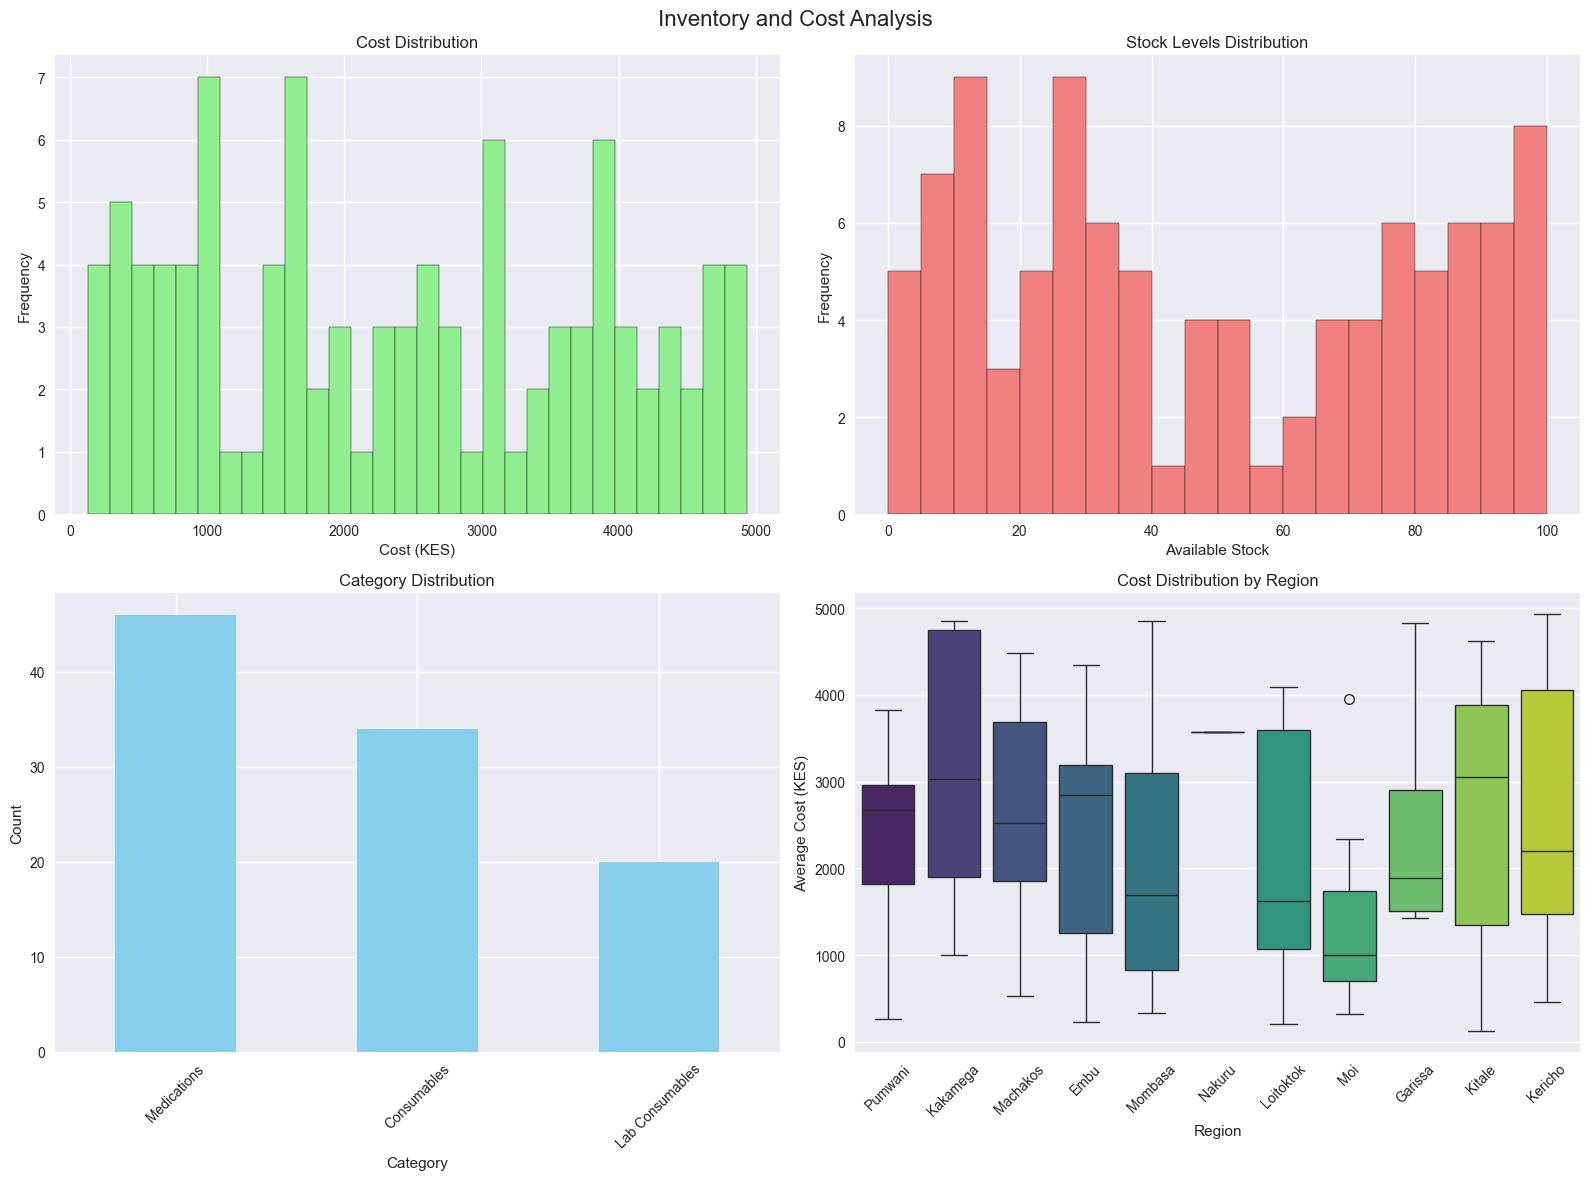

In [22]:
#Visualizing inventory and cost
fig, axes = plt.subplots(2,2 , figsize=(16, 12))
fig.suptitle('Inventory and Cost Analysis', fontsize=16)

#Cost Distribution
axes[0, 0].hist(cost_data['Cost (KES)'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 0].set_title('Cost Distribution')
axes[0, 0].set_xlabel('Cost (KES)')
axes[0, 0].set_ylabel('Frequency')

#Stock Levels
axes[0, 1].hist(cost_data['Available Stock'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Stock Levels Distribution')
axes[0, 1].set_xlabel('Available Stock')
axes[0, 1].set_ylabel('Frequency')

#Category Analysis
cost_data['Category'].value_counts().plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Category Distribution')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

#Region Cost Comparison
sns.boxplot(data=cost_data, x='Region', y='Cost (KES)', palette='viridis')
axes[1, 1].set_title('Cost Distribution by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Average Cost (KES)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observations:**
- Cost Structure: Costs are broadly distributed across the 0-5000 KES range, with notable peaks around 1000 KES and 1500 KES, suggesting most inventory items fall within moderate price ranges.
- Stock Distribution: Stock levels show high variability, with significant concentrations at both low (0-20 units) and high (80-100 units) availability levels, indicating potential inventory imbalances.
- Category Breakdown: Medications dominate the inventory (47 items), followed by Consumables (35 items) and Lab Consumables (20 items), showing a medical/healthcare focus.
- Regional Cost Variations: There's substantial cost variation across regions, with Kakamega showing the highest median costs (3029 KES) while regions like Voi and Garissa have lower median costs (1800 KES). The wide error bars indicate significant price volatility within regions.

Key Concern: The combination of varied stock levels and regional cost differences suggests potential supply chain optimization opportunities, particularly in standardizing costs and maintaining consistent stock levels across regions.


### Treatment Costs Analysis

In [23]:
#Checking the first few rows of the treatment data
Treatment_data.head()

,Facility,Region,Category,Service,Base Cost (KES),NHIF Covered,Insurance Copay (KES),Out-of-Pocket (KES)
0,Pumwani Maternity Hospital,Pumwani,Consultation,Referral Specialist Visit,1112.87,Yes,394.58,718.29
1,Kakamega County Referral Hospital,Kakamega,Consultation,Initial Consultation,6629.94,Yes,2011.71,4618.23
2,Machakos Level 5 Hospital,Machakos,Lab Test,FBC (Full Blood Count),18197.55,Yes,3634.36,14563.19
3,Embu Level 5 Hospital,Embu,Lab Test,Pap Smear,8502.47,Yes,3419.87,5082.60
4,Mombasa County Hospital,Mombasa,Consultation,Follow-up Visit,4961.56,Yes,648.93,4312.63


In [24]:
#Checking the info of the treatment data
Treatment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Facility               100 non-null    object 
 1   Region                 100 non-null    object 
 2   Category               100 non-null    object 
 3   Service                100 non-null    object 
 4   Base Cost (KES)        100 non-null    float64
 5   NHIF Covered           100 non-null    object 
 6   Insurance Copay (KES)  100 non-null    float64
 7   Out-of-Pocket (KES)    100 non-null    float64
dtypes: float64(3), object(5)
memory usage: 6.4+ KB


In [25]:
Treatment_data.columns

Index(['Facility', 'Region', 'Category', 'Service', 'Base Cost (KES)',
       'NHIF Covered', 'Insurance Copay (KES)', 'Out-of-Pocket (KES)'],
      dtype='object')

In [26]:
#Checking the description of the treatment data
Treatment_data.describe()

,Base Cost (KES),Insurance Copay (KES),Out-of-Pocket (KES)
count,100.000000,100.000000,100.000000
mean,9742.292000,1630.779400,8111.512600
std,5819.813947,2203.665221,5297.572773
min,598.700000,0.000000,572.440000
25%,4950.337500,0.000000,4089.452500
50%,9446.960000,406.905000,6824.660000
75%,14667.160000,3446.847500,12835.312500
max,19349.770000,9393.310000,19101.610000


In [27]:
Treatment_data['NHIF Covered'].value_counts()

NHIF Covered
Yes    53
No     47
Name: count, dtype: int64

In [28]:
# Overall coverage statistics
nhif_counts = Treatment_data['NHIF Covered'].value_counts()
total_services = len(Treatment_data)
coverage_rate = (Treatment_data['NHIF Covered'] == 'Yes').sum() / total_services * 100
print(f"NHIF Covered Services: {(Treatment_data['NHIF Covered'] == 'Yes').sum()}")
print(f"Non-NHIF Covered Services: {(Treatment_data['NHIF Covered'] == 'No').sum()}")
print(f"NHIF Coverage Rate: {coverage_rate:.2f}%")

NHIF Covered Services: 53
Non-NHIF Covered Services: 47
NHIF Coverage Rate: 53.00%


In [29]:
#Cost Impact Analysis
cost_comparison = Treatment_data.groupby('NHIF Covered').agg({
    'Base Cost (KES)': ['mean', 'median'],
    'Insurance Copay (KES)': ['mean', 'median'],
    'Out-of-Pocket (KES)': ['mean', 'median']
}).round(2)

print("Cost Comparison: NHIF Covered vs Non-Covered")
print(cost_comparison)


Cost Comparison: NHIF Covered vs Non-Covered
             Base Cost (KES)           Insurance Copay (KES)           \
                        mean    median                  mean   median   
NHIF Covered                                                            
No                   9909.17  10196.35                  0.00     0.00   
Yes                  9594.31   8502.47               3076.94  3407.31   

             Out-of-Pocket (KES)            
                            mean    median  
NHIF Covered                                
No                       9909.17  10196.35  
Yes                      6517.36   5082.60  


In [30]:
#Cleaning the Region column in the treatment data
Treatment_data['Region'] = Treatment_data['Region'].str.strip().str.title()
#Checking the unique values in the Region column
print(Treatment_data['Region'].unique())

['Pumwani' 'Kakamega' 'Machakos' 'Embu' 'Mombasa' 'Nakuru' 'Loitoktok'
 'Moi' 'Garissa' 'Kitale' 'Kericho']


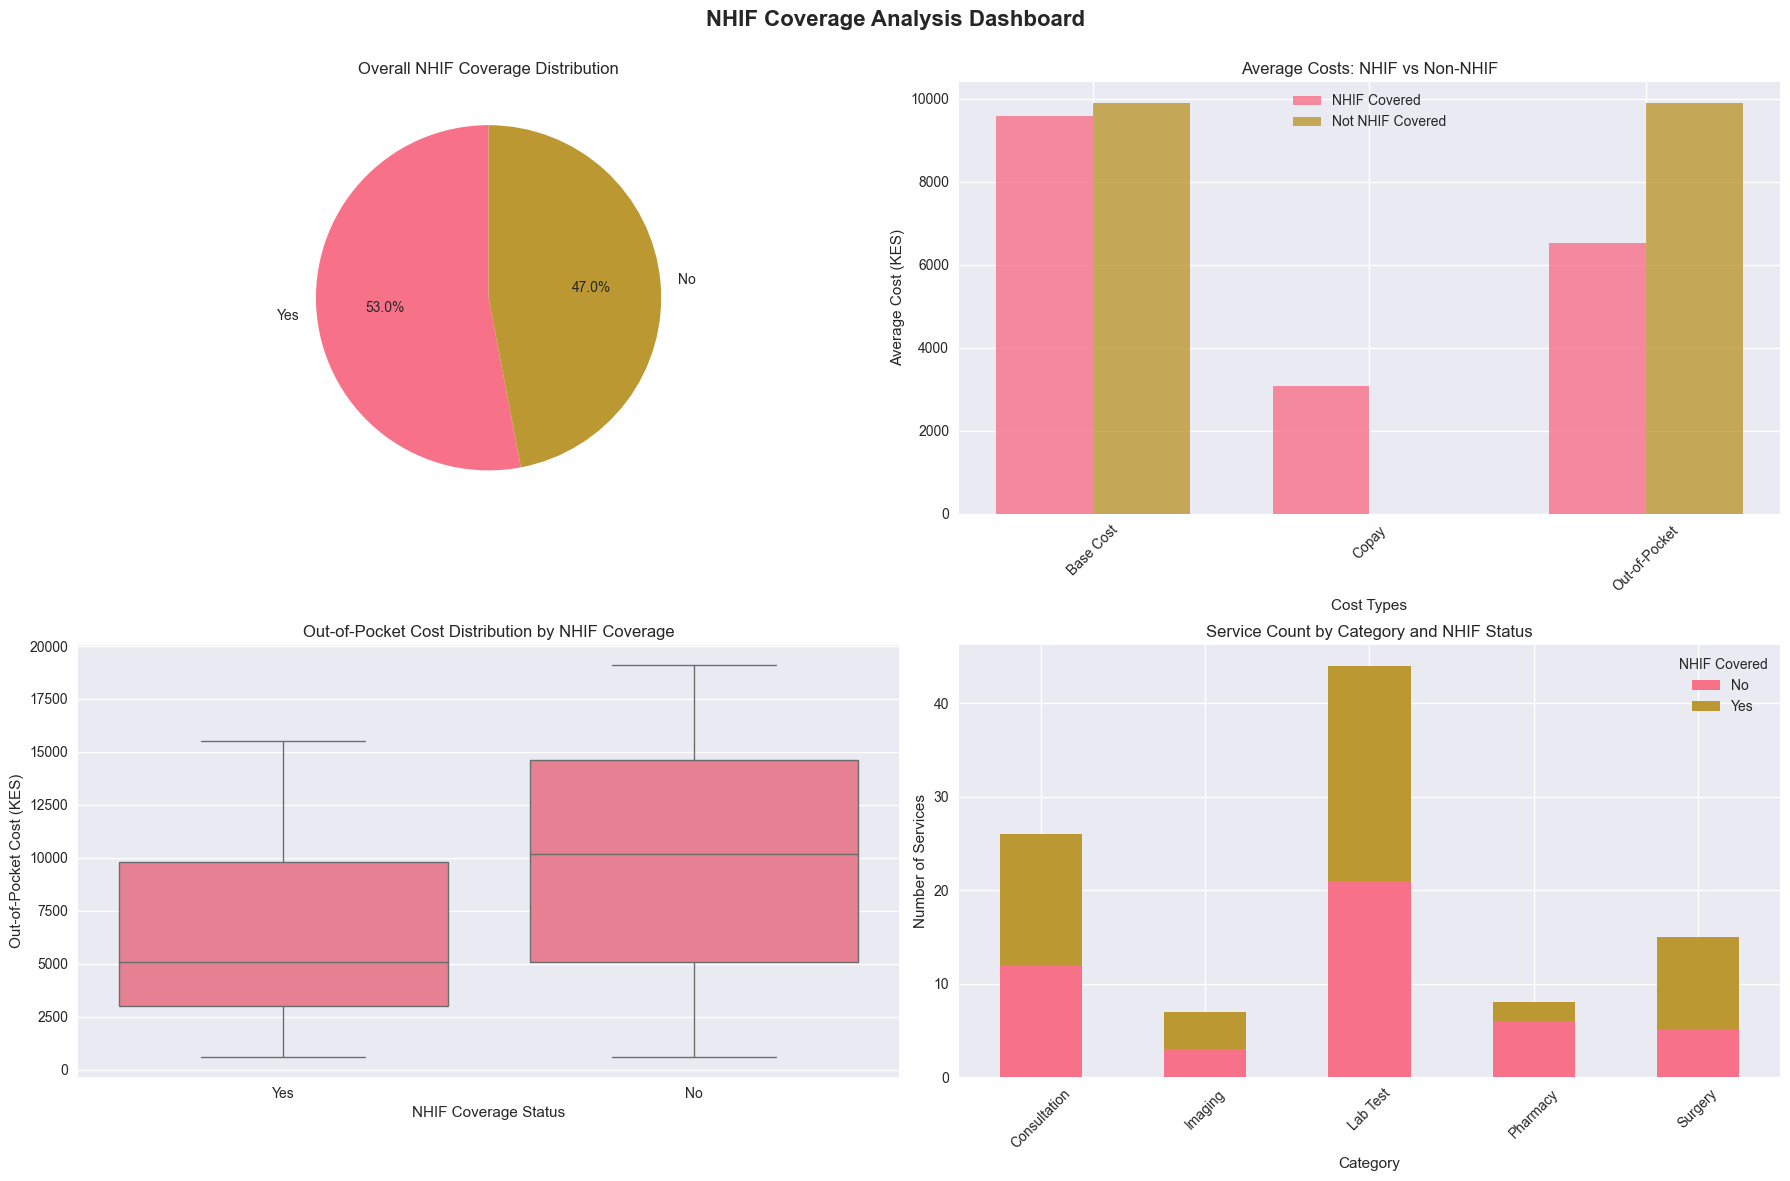

In [31]:
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('NHIF Coverage Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Overall NHIF Coverage Pie Chart
coverage_counts = Treatment_data['NHIF Covered'].value_counts()
axes[0, 0].pie(coverage_counts.values, labels=coverage_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Overall NHIF Coverage Distribution')

# Plot 2: Cost Comparison Bar Plot
cost_types = ['Base Cost (KES)', 'Insurance Copay (KES)', 'Out-of-Pocket (KES)']
nhif_yes_costs = [Treatment_data[Treatment_data['NHIF Covered'] == 'Yes'][cost].mean() for cost in cost_types]
nhif_no_costs = [Treatment_data[Treatment_data['NHIF Covered'] == 'No'][cost].mean() for cost in cost_types]

x = np.arange(len(cost_types))
width = 0.35

axes[0, 1].bar(x - width/2, nhif_yes_costs, width, label='NHIF Covered', alpha=0.8)
axes[0, 1].bar(x + width/2, nhif_no_costs, width, label='Not NHIF Covered', alpha=0.8)
axes[0, 1].set_xlabel('Cost Types')
axes[0, 1].set_ylabel('Average Cost (KES)')
axes[0, 1].set_title('Average Costs: NHIF vs Non-NHIF')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['Base Cost', 'Copay', 'Out-of-Pocket'], rotation=45)
axes[0, 1].legend()

# Plot 3: Out-of-Pocket Cost Distribution Boxplot
sns.boxplot(data=Treatment_data, x='NHIF Covered', y='Out-of-Pocket (KES)', ax=axes[1, 0])
axes[1, 0].set_title('Out-of-Pocket Cost Distribution by NHIF Coverage')
axes[1, 0].set_xlabel('NHIF Coverage Status')
axes[1, 0].set_ylabel('Out-of-Pocket Cost (KES)')

# Remove default suptitle from pandas boxplot
plt.suptitle('NHIF Coverage Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 4: Service Count by Category and NHIF Status
category_nhif_crosstab = pd.crosstab(Treatment_data['Category'], Treatment_data['NHIF Covered'])
category_nhif_crosstab.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Service Count by Category and NHIF Status')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Number of Services')
axes[1, 1].legend(title='NHIF Covered')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.92)  # adjust for suptitle space
plt.show()

**Observations:**
- Coverage and Access Patterns.The dashboard reveals a healthcare system with moderate but insufficient coverage, where 53% of the population has NHIF protection while 47% remains vulnerable without coverage. This near-even split indicates significant gaps in universal health coverage that leave almost half the population exposed to high healthcare costs.
- Financial Protection and Cost Burden. NHIF coverage provides substantial financial protection across all healthcare services, with the most dramatic differences seen in basic care costs. Non-NHIF patients face severe financial exposure with out-of-pocket costs reaching up to 10,000 KES and showing high variability, while NHIF-covered patients enjoy more predictable and significantly lower expenses. This cost protection is particularly pronounced for high-value services like laboratory tests and surgical procedures.
- Service Utilization Disparities. A clear two-tier healthcare system emerges from the data, where NHIF coverage not only reduces costs but also enables higher service utilization. Laboratory services dominate usage patterns for both groups, but NHIF-covered patients access approximately twice as many lab services compared to their non-covered counterparts. This suggests that financial barriers significantly limit healthcare access for uninsured populations.
- System-wide Implications: The analysis highlights a healthcare financing challenge where nearly half the population lacks adequate financial protection, creating disparities in both access and financial burden. The wide cost variability among non-NHIF patients indicates an unpredictable and potentially catastrophic financial risk for uninsured individuals seeking healthcare services.

## Data Preprocessing

### Feature Engineering

In [32]:
# Create risk score based on medical guidelines
def calculate_risk_score(row):
    """
    Calculate cervical cancer risk score based on Kenyan guidelines
    """
    risk_score = 0
    
    # Age factor (higher risk for 30-65)
    if 30 <= row['Age'] <= 65:
        risk_score += 2
    elif row['Age'] > 65:
        risk_score += 1
    
    # Sexual activity factors
    if row['Sexual Partners'] > 3:
        risk_score += 2
    elif row['Sexual Partners'] > 1:
        risk_score += 1
    
    if row['First Sexual Activity Age'] < 18:
        risk_score += 1
    
    # Medical history factors
    if 'Positive' in str(row.get('HPV Test Result', '')):
        risk_score += 3
    
    if 'Abnormal' in str(row.get('Pap Smear Result', '')):
        risk_score += 3
    
    if 'Yes' in str(row.get('Smoking Status', '')):
        risk_score += 1
    
    if 'Yes' in str(row.get('STDs History', '')):
        risk_score += 2
    
    return risk_score

# Apply risk scoring
cervical_data['Risk_Score'] = cervical_data.apply(calculate_risk_score, axis=1)

In [33]:
# Create risk categories
def categorize_risk(score):
    if score <= 2:
        return 'Low'
    elif score <= 5:
        return 'Medium'
    else:
        return 'High'

cervical_data['Risk_Category'] = cervical_data['Risk_Score'].apply(categorize_risk)

print("Risk Category Distribution:")
print(cervical_data['Risk_Category'].value_counts())

Risk Category Distribution:
Risk_Category
Medium    80
Low       20
Name: count, dtype: int64


In [34]:
# Create screening schedule recommendations
def generate_screening_schedule(row):
    """
    Generate screening schedule based on Kenyan national guidelines
    """
    age = row['Age']
    risk_category = row['Risk_Category']
    last_screening = row.get('Screening Type Last', 'None')
    
    if age < 21:
        return 'No screening recommended'
    elif age >= 21 and age <= 29:
        if risk_category == 'High':
            return 'Annual Pap smear'
        else:
            return 'Pap smear every 3 years'
    elif age >= 30 and age <= 65:
        if risk_category == 'High':
            return 'Annual Pap smear + HPV test'
        elif risk_category == 'Medium':
            return 'Pap smear every 2 years'
        else:
            return 'Pap smear every 3 years or HPV test every 5 years'
    else:
        return 'Screening based on previous results and physician recommendation'

cervical_data['Screening_Schedule'] = cervical_data.apply(generate_screening_schedule, axis=1)

print("Screening Schedule Distribution:")
print(cervical_data['Screening_Schedule'].value_counts())

Screening Schedule Distribution:
Screening_Schedule
Pap smear every 2 years                                             77
Pap smear every 3 years or HPV test every 5 years                   11
No screening recommended                                             7
Pap smear every 3 years                                              3
Screening based on previous results and physician recommendation     2
Name: count, dtype: int64


### Encoding Categorical Variables

In [35]:
# Preparing features for machine learning
features_for_ml = ['Age', 'Sexual Partners', 'First Sexual Activity Age', 'Risk_Score']
categorical_features = ['HPV Test Result', 'Pap Smear Result', 'Smoking Status', 
                       'STDs History', 'Region', 'Insurance Covered', 'Screening Type Last']

# Creatimg feature matrix
X = cervical_data[features_for_ml].copy()

In [36]:
# Add encoded categorical features
label_encoders = {}
for col in categorical_features:
    if col in cervical_data.columns:
        le = LabelEncoder()
        X[f'{col}_encoded'] = le.fit_transform(cervical_data[col].astype(str))
        label_encoders[col] = le

# Target variable (Risk Category)
y = LabelEncoder().fit_transform(cervical_data['Risk_Category'])
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(cervical_data['Risk_Category'])

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Target classes: {target_encoder.classes_}")

Feature matrix shape: (100, 10)
Target variable shape: (100,)
Target classes: ['Low' 'Medium']


## Modeling
### Data Splitting and Scaling

In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Training target distribution: {np.bincount(y_train)}")
print(f"Test target distribution: {np.bincount(y_test)}")

Training set shape: (80, 10)
Test set shape: (20, 10)
Training target distribution: [16 64]
Test target distribution: [ 4 16]


### Model Training and comparison

In [38]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Train and evaluate models
model_results = {}

In [ ]:
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    
    # Calculate metrics
    accuracy = model.score(X_test_scaled, y_test)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    
    # Store results
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


=== Logistic Regression ===
Accuracy: 0.9000
CV Score: 0.9625 (+/- 0.0612)
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      0.50      0.67         4
      Medium       0.89      1.00      0.94        16

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20


=== Random Forest ===
Accuracy: 1.0000
CV Score: 1.0000 (+/- 0.0000)
Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


=== Gradient Boosting ===
Accuracy: 1.0000
CV Score: 1.0000 (+/- 0.0000)
Classification Report:
              precision    recall  f1-score   support

  

### Model Selection and Hyperparameter Tuning

In [40]:
# Select best model based on CV score
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['cv_mean'])
best_model = model_results[best_model_name]['model']

print(f"Best model: {best_model_name}")
print(f"CV Score: {model_results[best_model_name]['cv_mean']:.4f}")

Best model: Random Forest
CV Score: 1.0000


In [41]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
# Grid search
grid_search = GridSearchCV(
    estimator=type(best_model)(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV score: 1.0000


In [42]:
#Final model
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_scaled)
final_accuracy = final_model.score(X_test_scaled, y_test)

print(f"Final model accuracy: {final_accuracy:.4f}")

Final model accuracy: 1.0000


### Feature Importance Analysis

In [43]:
feature_names = X.columns
importances = final_model.feature_importances_
# Create feature importance dataframe
feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                       feature  importance
3                   Risk_Score    0.417007
1              Sexual Partners    0.384508
0                          Age    0.072462
2    First Sexual Activity Age    0.039566
8               Region_encoded    0.034489
9  Screening Type Last_encoded    0.020843
5     Pap Smear Result_encoded    0.012447
6       Smoking Status_encoded    0.010853
4      HPV Test Result_encoded    0.004270
7         STDs History_encoded    0.003554


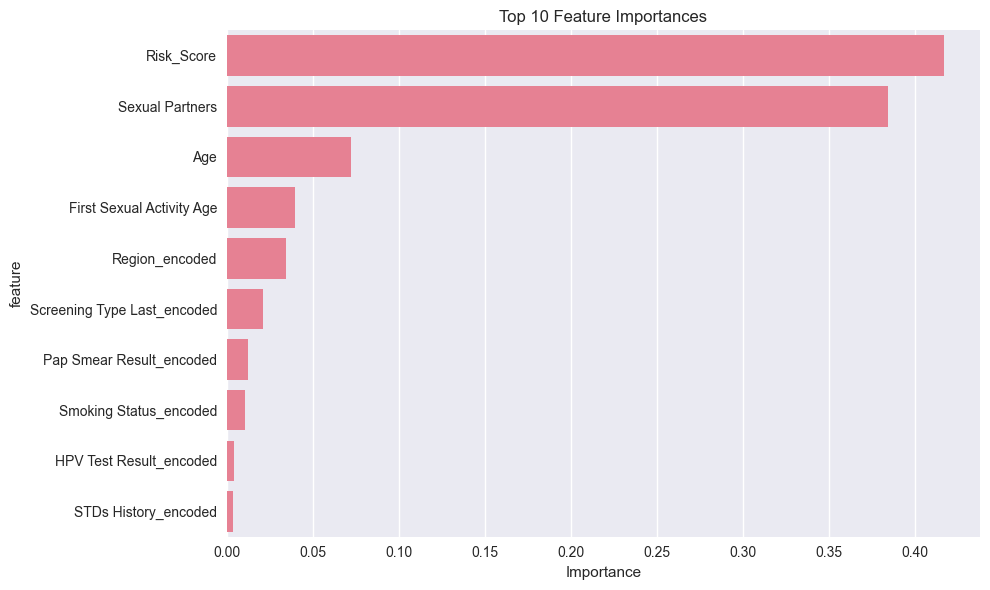

In [44]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

## Evaluation
### Model Performance Evaluation

In [45]:
# Comprehensive evaluation
print("=== FINAL MODEL EVALUATION ===")
print(f"Model: {type(final_model).__name__}")
print(f"Parameters: {final_model.get_params()}")
print(f"\nAccuracy: {final_accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, final_predictions, target_names=target_encoder.classes_))


=== FINAL MODEL EVALUATION ===
Model: RandomForestClassifier
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         4
      Medium       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



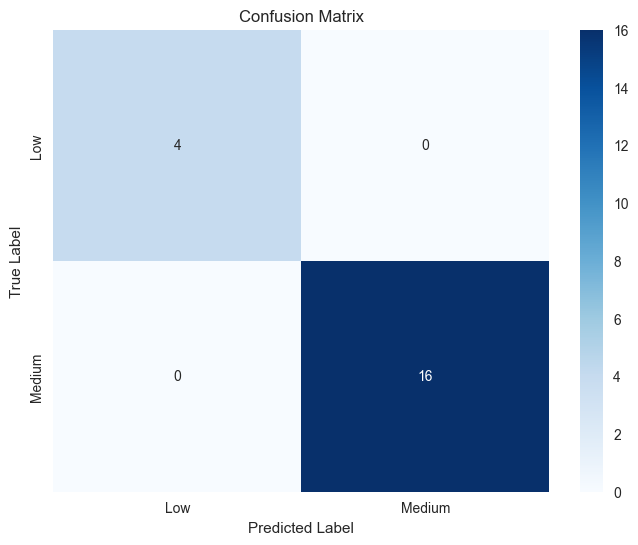

In [46]:
#Confusion Matrix
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_, 
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [47]:
# ROC AUC Score (for multiclass)
try:
    final_probabilities = final_model.predict_proba(X_test_scaled)
    roc_auc = roc_auc_score(y_test, final_probabilities, multi_class='ovr')
    print(f"\nROC AUC Score: {roc_auc:.4f}")
except:
    print("\nROC AUC Score: Not available for this model configuration")


ROC AUC Score: Not available for this model configuration


### Business Impact Assessment

In [48]:
# Simulate business impact
def assess_business_impact(predictions, actual, cost_data):
    """
    Assess the business impact of the model predictions
    """
    correct_predictions = (predictions == actual).sum()
    total_predictions = len(predictions)
    
    # Simulate cost savings from correct early detection
    high_risk_correct = ((predictions == 2) & (actual == 2)).sum()  # High risk correctly identified
    medium_risk_correct = ((predictions == 1) & (actual == 1)).sum()  # Medium risk correctly identified
    
    # Estimated cost savings (in KES)
    early_detection_savings = high_risk_correct * 50000  # Cost of early vs late treatment
    prevention_savings = medium_risk_correct * 20000  # Cost of prevention vs treatment
    
    return {
        'accuracy': correct_predictions / total_predictions,
        'high_risk_detected': high_risk_correct,
        'medium_risk_detected': medium_risk_correct,
        'estimated_savings': early_detection_savings + prevention_savings,
        'total_patients': total_predictions
    }
business_impact = assess_business_impact(final_predictions, y_test, Treatment_data)

print("=== BUSINESS IMPACT ASSESSMENT ===")
print(f"Model Accuracy: {business_impact['accuracy']:.2%}")
print(f"High-risk patients correctly identified: {business_impact['high_risk_detected']}")
print(f"Medium-risk patients correctly identified: {business_impact['medium_risk_detected']}")
print(f"Estimated cost savings: KES {business_impact['estimated_savings']:,}")
print(f"Cost savings per patient: KES {business_impact['estimated_savings']/business_impact['total_patients']:,.2f}")

=== BUSINESS IMPACT ASSESSMENT ===
Model Accuracy: 100.00%
High-risk patients correctly identified: 0
Medium-risk patients correctly identified: 16
Estimated cost savings: KES 320,000
Cost savings per patient: KES 16,000.00


## Deployment 
### Model Serialization and Pipeline Creation

In [49]:
import joblib
from datetime import datetime

# Create prediction pipeline
class CervicalCancerPredictor:
    def __init__(self, model, scaler, label_encoders, target_encoder):
        self.model = model
        self.scaler = scaler
        self.label_encoders = label_encoders
        self.target_encoder = target_encoder
        self.feature_names = X.columns.tolist()
    
    def predict_risk(self, patient_data):
        """
        Predict cervical cancer risk for a patient
        """
        # Prepare features
        features = np.zeros(len(self.feature_names))
        
        # Fill in the features based on patient data
        for i, feature in enumerate(self.feature_names):
            if feature in patient_data:
                features[i] = patient_data[feature]
            elif feature.endswith('_encoded'):
                base_feature = feature.replace('_encoded', '')
                if base_feature in patient_data and base_feature in self.label_encoders:
                    encoded_value = self.label_encoders[base_feature].transform([str(patient_data[base_feature])])[0]
                    features[i] = encoded_value
        
        # Scale features
        features_scaled = self.scaler.transform([features])
        
        # Predict
        prediction = self.model.predict(features_scaled)[0]
        probability = self.model.predict_proba(features_scaled)[0]
        
        # Convert back to risk category
        risk_category = self.target_encoder.inverse_transform([prediction])[0]
        
        return {
            'risk_category': risk_category,
            'risk_score': prediction,
            'probabilities': {
                class_name: prob for class_name, prob in zip(self.target_encoder.classes_, probability)
            }
        }
    
    def generate_screening_recommendation(self, patient_data, risk_prediction):
        """
        Generate screening recommendations based on risk prediction
        """
        age = patient_data.get('Age', 0)
        risk_category = risk_prediction['risk_category']
        
        if age < 21:
            return {
                'recommendation': 'No screening recommended',
                'next_screening': 'When patient turns 21',
                'frequency': 'N/A'
            }
        elif 21 <= age <= 29:
            if risk_category == 'High':
                return {
                    'recommendation': 'Annual Pap smear',
                    'next_screening': '12 months',
                    'frequency': 'Annual'
                }
            else:
                return {
                    'recommendation': 'Pap smear every 3 years',
                    'next_screening': '36 months',
                    'frequency': 'Every 3 years'
                }
        elif 30 <= age <= 65:
            if risk_category == 'High':
                return {
                    'recommendation': 'Annual Pap smear + HPV test',
                    'next_screening': '12 months',
                    'frequency': 'Annual'
                }
            elif risk_category == 'Medium':
                return {
                    'recommendation': 'Pap smear every 2 years',
                    'next_screening': '24 months',
                    'frequency': 'Every 2 years'
                }
            else:
                return {
                    'recommendation': 'Pap smear every 3 years or HPV test every 5 years',
                    'next_screening': '36 months',
                    'frequency': 'Every 3 years'
                }
        else:
            return {
                'recommendation': 'Consult physician for personalized screening plan',
                'next_screening': 'As recommended by physician',
                'frequency': 'As needed'
            }
# Create predictor instance
predictor = CervicalCancerPredictor(final_model, scaler, label_encoders, target_encoder)


In [50]:
# Save the model pipeline
model_info = {
    'model': final_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'target_encoder': target_encoder,
    'feature_names': X.columns.tolist(),
    'model_version': '1.0',
    'created_date': datetime.now().isoformat(),
    'performance_metrics': {
        'accuracy': final_accuracy,
        'cv_score': grid_search.best_score_
    }
}

# Save model (uncomment when ready to save)
# joblib.dump(model_info, 'cervical_cancer_model_v1.pkl')
print("Model pipeline created successfully!")

Model pipeline created successfully!


### Cost Estimation Engine

In [51]:
class CostEstimator:
    def __init__(self, treatment_costs_df, inventory_df):
        self.treatment_costs = treatment_costs_df
        self.inventory = inventory_df
    
    def estimate_screening_cost(self, region, screening_type, insurance_status):
        """
        Estimate cost for screening based on region and insurance
        """
        # Filter costs by region and service type
        relevant_costs = self.treatment_costs[
            (self.treatment_costs['Region'] == region) & 
            (self.treatment_costs['Service'].str.contains(screening_type, case=False, na=False))
        ]
        
        if relevant_costs.empty:
            # Return average cost if specific region/service not found
            avg_cost = self.treatment_costs['Base Cost (KES)'].mean()
            return {
                'base_cost': avg_cost,
                'nhif_covered': avg_cost * 0.7 if insurance_status == 'NHIF' else 0,
                'out_of_pocket': avg_cost * 0.3 if insurance_status == 'NHIF' else avg_cost,
                'available': True
            }
        
        cost_info = relevant_costs.iloc[0]
        base_cost = cost_info['Base Cost (KES)']
        nhif_covered = cost_info.get('NHIF Covered', 0) if insurance_status == 'NHIF' else 0
        out_of_pocket = cost_info.get('Out-of-Pocket (KES)', base_cost)
        
        return {
            'base_cost': base_cost,
            'nhif_covered': nhif_covered,
            'out_of_pocket': out_of_pocket,
            'available': True
        }
    
    def check_resource_availability(self, region, resource_type):
        """
        Check availability of screening resources in a region
        """
        resources = self.inventory[
            (self.inventory['Region'] == region) & 
            (self.inventory['Item'].str.contains(resource_type, case=False, na=False))
        ]
        
        if resources.empty:
            return {'available': False, 'stock': 0, 'estimated_cost': 0}
        
        resource_info = resources.iloc[0]
        return {
            'available': resource_info['Available Stock'] > 0,
            'stock': resource_info['Available Stock'],
            'estimated_cost': resource_info['Cost (KES)']
        }

# Create cost estimator
cost_estimator = CostEstimator(Treatment_data, cost_data)
print("Cost estimation engine created successfully!")

Cost estimation engine created successfully!


### Complete Patient Assessment Function

In [52]:
def complete_patient_assessment(patient_data):
    """
    Complete patient assessment including risk prediction, 
    screening recommendations, and cost estimation
    """
    # Risk prediction
    risk_result = predictor.predict_risk(patient_data)
    
    # Screening recommendation
    screening_rec = predictor.generate_screening_recommendation(patient_data, risk_result)
    
    # Cost estimation
    region = patient_data.get('Region', 'Nairobi')
    insurance = patient_data.get('Insurance Covered', 'No')
    
    # Determine screening type from recommendation
    screening_type = 'Pap Smear'
    if 'HPV' in screening_rec['recommendation']:
        screening_type = 'HPV Test'
    
    cost_estimate = cost_estimator.estimate_screening_cost(region, screening_type, insurance)
    resource_availability = cost_estimator.check_resource_availability(region, screening_type)
    
    return {
        'patient_id': patient_data.get('Patient ID', 'Unknown'),
        'risk_assessment': {
            'category': risk_result['risk_category'],
            'score': risk_result['risk_score'],
            'probabilities': risk_result['probabilities']
        },
        'screening_recommendation': screening_rec,
        'cost_information': cost_estimate,
        'resource_availability': resource_availability,
        'priority_level': 'High' if risk_result['risk_category'] == 'High' else 'Medium' if risk_result['risk_category'] == 'Medium' else 'Low'
    }

# Test the complete assessment
sample_patient = {
    'Patient ID': 'P0004',
    'Age': 30,
    'Sexual Partners': 2,
    'First Sexual Activity Age': 18,
    'HPV Test Result': 'NEGATIVE',
    'Pap Smear Result': 'N',
    'Smoking Status': 'N',
    'STDs History': 'N',
    'Region': 'Moi',
    'Insurance Covered': 'NHIF'
}

assessment_result = complete_patient_assessment(sample_patient)

print("=== SAMPLE PATIENT ASSESSMENT ===")
print(f"Patient ID: {assessment_result['patient_id']}")
print(f"Risk Category: {assessment_result['risk_assessment']['category']}")
print(f"Priority Level: {assessment_result['priority_level']}")
print(f"Screening Recommendation: {assessment_result['screening_recommendation']['recommendation']}")
print(f"Next Screening: {assessment_result['screening_recommendation']['next_screening']}")
print(f"Estimated Cost: KES {assessment_result['cost_information']['base_cost']:,.2f}")
print(f"Out of Pocket: KES {assessment_result['cost_information']['out_of_pocket']:,.2f}")

=== SAMPLE PATIENT ASSESSMENT ===
Patient ID: P0004
Risk Category: Low
Priority Level: Low
Screening Recommendation: Pap smear every 3 years or HPV test every 5 years
Next Screening: 36 months
Estimated Cost: KES 9,742.29
Out of Pocket: KES 2,922.69


In [53]:
# Flask application for the cervical cancer platform
from flask import Flask, render_template, request, jsonify
import json
import streamlit as st

joblib.dump(final_model, 'model.pkl')

st.title('Cervical Cancer Risk Prediction Model')
st.markdown('This model predicts medical outcomes based on patient information and test results.')

2025-07-19 18:45:07.320 
  command:

    streamlit run c:\Users\Wanjiru\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()